In [ ]:
# Import Important Libraries
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing, linear_model # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_recall_fscore_support # 
import numpy as np
import pandas as pd
import math


import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Reading the CSV/dropping null values and used values method 
df = pd.read_csv('winequality-combined.csv')
df1 = df.dropna()
df2 = df1.values


In [ ]:
# Separating Dataset into Features and Target Variables
# X: (First 12 Columns)
# y: (Column 13)
# a-g and j

X = df1[['fixed acidity','volatile acidity','citric acid',
'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates']].values
y = df2[:, 12]




In [ ]:
#Splitting the data into train/test (80%/20%)
x_scale = preprocessing.scale(X)

x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size = 0.20, train_size=0.80)


In [ ]:

logreg = linear_model.LogisticRegression(C=10**8) #no regularization 
logreg.fit(x_train, y_train)
yhat_train = logreg.predict(x_train)

acc_train = accuracy_score(y_train, yhat_train)
print("Accuracy on training data = %f" % acc_train)

yhat_test = logreg.predict(x_test)
acc_test = accuracy_score(y_test, yhat_test)
print("Accuracy on test data = %f" % acc_test)


Accuracy on training data = 0.984222
Accuracy on test data = 0.976154


In [ ]:
#Logistic Model without Regularization 
w = logreg.coef_
intercept = logreg.intercept_
prec, recall ,fscore,_ = precision_recall_fscore_support(y_train,yhat_train,average='binary')
print("Precision:",prec,"\nRecall:",recall,"\nFscore:",fscore)
print("Coefficients:",w)
print("Intercept:",intercept)


Precision: 0.9892911779704232 
Recall: 0.9897959183673469 
Fscore: 0.9895434838051518
Coefficients: [[-1.36438301 -2.03344597  0.48175873  0.96076421 -1.35748333 -1.03400905
   4.00375792 -1.72163622]]
Intercept: [4.50607657]


In [ ]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
acc_train_ridge = []
acc_test_ridge = []
for c in cVals:
    # Creating Logistic Regression model object with 'l2' regularization
    logreg_l2 = linear_model.LogisticRegression(C = c)

    # Fitting model on training set
    logreg_l2.fit(x_train,y_train)

    # Finding prediction on training set
    yhat_train_l2 = logreg_l2.predict(x_train)

    # Finding training accuracy
    acc_train_l2 = accuracy_score(y_train, yhat_train_l2)
    acc_train_ridge.append(acc_train_l2)
    print("Accuracy on train data with ridge = %f" % acc_train_l2)

print('')

for c in cVals:
    logreg_l2 = linear_model.LogisticRegression(C = c)
    logreg_l2.fit(x_train,y_train)
    # Finding prediction on testing set
    yhat_test_l2 = logreg_l2.predict(x_test)

    # Finding testing accuracy
    acc_test_l2 = accuracy_score(y_test, yhat_test_l2)
    acc_test_ridge.append(acc_test_l2)
    print("Accuracy on test data with ridge = %f" % acc_test_l2)

Accuracy on train data with ridge = 0.760824
Accuracy on train data with ridge = 0.960362
Accuracy on train data with ridge = 0.979411
Accuracy on train data with ridge = 0.983837
Accuracy on train data with ridge = 0.984222
Accuracy on train data with ridge = 0.984414
Accuracy on train data with ridge = 0.984222

Accuracy on test data with ridge = 0.758462
Accuracy on test data with ridge = 0.950769
Accuracy on test data with ridge = 0.972308
Accuracy on test data with ridge = 0.973846
Accuracy on test data with ridge = 0.976154
Accuracy on test data with ridge = 0.976154
Accuracy on test data with ridge = 0.976154


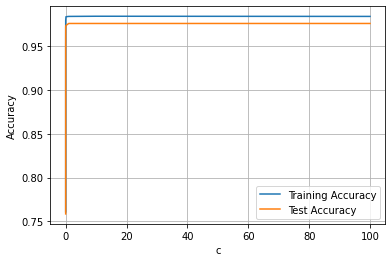

In [ ]:
#Plotting 'training\testing accuracy'(y-axis) VS. 'c'(x-axis)

plt.plot(cVals, acc_train_ridge, cVals, acc_test_ridge)
plt.grid()
plt.xlabel('c')
plt.ylabel('Accuracy')

# Including a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

In [ ]:
#Implementing Lasso Regularization with our model. 
#Note that cVals is defined above 
acc_train_lasso = []
acc_test_lasso = []
for c in cVals: 
    logreg_l1 = linear_model.LogisticRegression(penalty = 'l1', C = c, solver = 'saga')
    logreg_l1.fit(x_train,y_train)
    yhat_train_l1 = logreg_l1.predict(x_train)
    acc_train_l1 = accuracy_score(y_train, yhat_train_l1)
    print("Accuracy with Ridge Regression (train):",acc_train_l1)
    acc_train_lasso.append(acc_train_l1)

print()

for c in cVals:
    logreg_l1 = linear_model.LogisticRegression(penalty = 'l1', C = c, solver = 'saga')
    logreg_l1.fit(x_train,y_train)
    yhat_test_l1 = logreg_l1.predict(x_test)
    acc_test_l1 = accuracy_score(y_test, yhat_test_l1)
    print("Accuracy with Ridge Regression (test):",acc_test_l1)
    acc_test_lasso.append(acc_test_l1)


Accuracy with Ridge Regression (train): 0.7542813161439292
Accuracy with Ridge Regression (train): 0.7944968250913989
Accuracy with Ridge Regression (train): 0.9784491052530306
Accuracy with Ridge Regression (train): 0.983644410236675
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
Accuracy with Ridge Regression (train): 0.9844140850490668
Accuracy with Ridge Regression (train): 0.9844140850490668
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
Accuracy with Ridge Reg

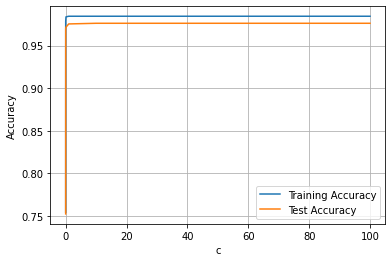

In [ ]:
#Plotting the Test and Train accuracies for Lasso Regression
plt.plot(cVals, acc_train_lasso, cVals, acc_test_lasso)
plt.grid()
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

logreg_poly = linear_model.LogisticRegression(C = 10**8)
logreg_poly.fit(x_train_poly, y_train)
yhat_train_poly = logreg_poly.predict(x_train_poly)
yhat_test_poly = logreg_poly.predict(x_test_poly)


acc_train_poly = accuracy_score(y_train, yhat_train_poly)
acc_test_poly = accuracy_score(y_test, yhat_test_poly)
print("Accuracy with Polynomial Transform (train):",acc_train_poly)
print("Accuracy with Polynomial Transform (test):",acc_test_poly)

Accuracy with Polynomial Transform (train): 0.9948046950163556
Accuracy with Polynomial Transform (test): 0.9861538461538462
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
